<i>Written by: Ahsan Khan, on behalf of Alberta Machine Intelligence Institute for the Al Pathways Partnership supported by Prairies Economic Development Canada</i>

# Lab 1: K-NearestNeighbour (KNN)

For the first lab activity we will be using a dataset which contains the chemical compositions of different wines. More information about the dataset can be found here: https://archive.ics.uci.edu/ml/datasets/wine. This dataset is built-in the scikit-learn library and we can load it directly from there. Recall that KNNs are used for classification predictions based on the 'closeness' of our input to other datapoints. KNNs use distance metrics such as euclidean, manhattan, jaccard, etc; with euclidean being the most widely used and the default metric in the scikit-learn library.

Familiarize yourself with these imports as you will be using them a lot in your ML journey.

#### Loading libraries

In [ ]:
#Crucial data processing and analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading the modules required to build and evaluate a KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Loading the wine dataset from sklearn
from sklearn.datasets import load_wine

#### Understanding the dataset

In [ ]:
#loading data
wine = load_wine()

In [ ]:
# There are three key parts to the dataset we care about
#(1) The features(X)
X = wine.data
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
#(2) The target classes(y). The wines are placed into three classes.
y = wine.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
#(3) The feature names
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

##### This is how the data looks like in a pandas dataframe

In [ ]:
df = pd.DataFrame(X, columns=wine['feature_names'])
df['class'] = wine.target


print("Number of rows in the data: " + str(df.shape[0]))
df.head()

Number of rows in the data: 178


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


##### Observing the statistics of our data

In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


(Note the max, min and std values for each column)

+## Lab Activity One: Simple K-NN Model

In [ ]:
import numpy as np

# Generate a random integer between 5 (inclusive) and 15 (exclusive)
random_state_range = np.random.randint(1, 100)
print("Random State: " , random_state_range)

random_test_size = np.random.randint(20, 100)
print("Random Test Size: " , random_test_size)



Random State:  41
Random Test Size:  98


> [AX] indicates an activity to be answered.

##### [A1] Split your data into training and testing. Use ``X_train``, ``y_train``,``X_test`` and ``y_test`` as the assigned variables respectively.

In [ ]:
# %% lets split the training data into training and validation data
X_train, X_test, y_train, y_test = train_test_split(df,df['class'], test_size=random_test_size, random_state=random_state_range)

##### [A2] Instantiate model using the default settings

In [ ]:
knn = KNeighborsClassifier() #creates a KNN classifier object named knn

##### [A3] Fit the model

In [ ]:
knn.fit(X_train,y_train) # used to train (fit) the K-Nearest Neighbors (KNN) classifier model on your training data.

KNeighborsClassifier()

##### [A4] Predict on your test data

In [ ]:
y_pred = knn.predict(X_test) #used to make predictions using the K-Nearest Neighbors (KNN) classifier model that you previously trained and fit on your training data.

##### [A5] Evaluate model performance using the ``accuracy_score()`` function

In [ ]:
accuracy = accuracy_score(y_test, y_pred) # function call to scikit-learn's and calculate the accuracy of a classification model's predictions.
print("Accuracy:", accuracy)

Accuracy: 0.7653061224489796


##### [A6] Evaluate model performance using the ``classisification_report()`` function

In [ ]:
report = classification_report(y_test, y_pred) #report is variable and clasification_report is a function with 2 arguments which is y_test is used for actual label and y_predict is to predict the label on dataset
print(report) #printing and showing the report

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.78      0.68      0.72        37
           2       0.62      0.64      0.63        28

    accuracy                           0.77        98
   macro avg       0.76      0.76      0.76        98
weighted avg       0.76      0.77      0.76        98



Granted you successfully fit and predicted a knn classifier on the wine dataset, you will notice the performance of the model is not great. Going back to the statistics of our dataset (the ``df.describe()`` function above)
 - observe the standard deviation of the ``proline`` column. The range of the proline values are siginificantly different that the rest of the dataset (high std).
 - observe the min and max of the ``nonflavanoid_phenols`` column. These values are all between 0 and 1 (percentage) while rest of the data is not.

These non-standarized values affect our model fitting and predictions. Recall that the KNN algorithm uses distance measures to classify similar elements, since some of the feature's values are on a different scale we must **normalize** this dataset.

##### Normalizing your dataset using the ``StandardScaler()`` function and fitting it to your data (normalizing both the ``X_train`` and ``X_test`` values).

In [ ]:
#Transform data
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##### [A7] Instantiate a new KNN model (``model_2``), fit, predict and evaluate your accuracy again.

In [ ]:
# Instantiate the KNN model
model_2 = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
model_2.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_2.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy of model_2:", accuracy)

Accuracy of model_2: 0.9795918367346939


### Lab Activity Two: Changing the K values

Initially we did not assign any parameters when instantiating the KNN classifer (``model = KNeighborsClassifier()``). The most important parameter to set is the ``K`` value. Recall the ``K`` in the KNN algorithm represents the number of nearest neighbours. So if the value of ``K`` is 3, it means that the 3 nearest neighbours are considered for computation.

In [ ]:
k_list = [1,2,3,4,6,8,12,15,20,25]
accuracy_scores_list = []

##### [A8] Using a for loop, iterate through the ``k_list`` above and instantiate (using a different ``K`` everytime), fit, predict and evaluate the models. Store the accuracy results in the ``accuracy_scores_list``.

In [ ]:
# Iterate through the k_list
for k in k_list:
    # Instantiate the KNN model with the current K value
    model = KNeighborsClassifier(k)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate accuracy and append it to the accuracy_scores_list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_list.append(accuracy)

    print(f"K = {k}: Accuracy = {accuracy}")


K = 1: Accuracy = 0.9387755102040817
K = 2: Accuracy = 0.9693877551020408
K = 3: Accuracy = 0.9795918367346939
K = 4: Accuracy = 0.9693877551020408
K = 6: Accuracy = 0.9795918367346939
K = 8: Accuracy = 1.0
K = 12: Accuracy = 0.9897959183673469
K = 15: Accuracy = 0.9897959183673469
K = 20: Accuracy = 0.9897959183673469
K = 25: Accuracy = 0.9795918367346939


##### [A9] Plot a graph of the ``K`` values vs its respective accuracy score.

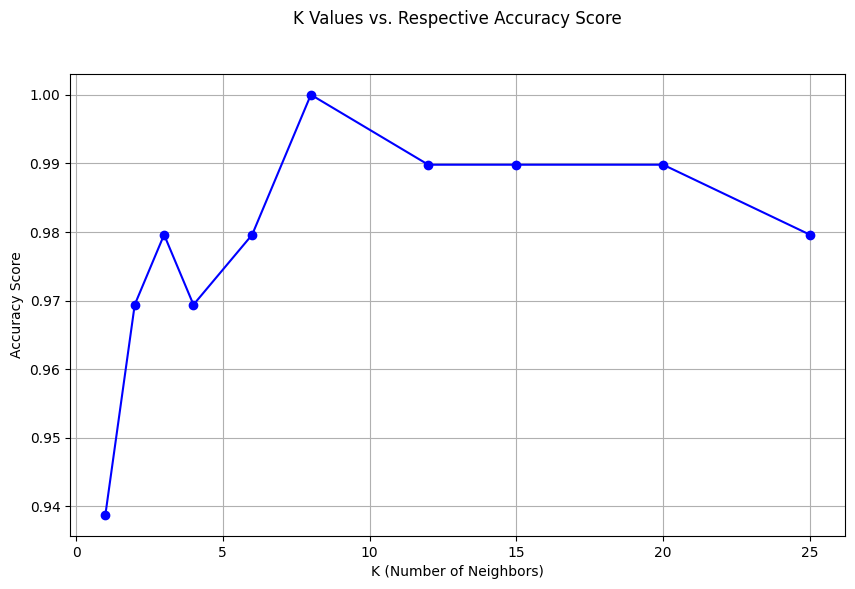

In [ ]:
import matplotlib.pyplot as plt #import libraries

# Plot K values vs. Accuracy scores
plt.figure(figsize=(10, 6)) #creating exact value of the size of lenght and width
plt.plot(k_list, accuracy_scores_list, marker='o', linestyle='-', color='b') #plotting the k values using number of nieghbors and  accuracy score list
plt.title('K Values vs. Respective Accuracy Score\n\n') # titles of the graph
plt.xlabel('K (Number of Neighbors)') #x label name
plt.ylabel('Accuracy Score') #y label name
plt.grid(True) #grid line

# Display the plot
plt.show() #showing the graph

#### Discussion

##### [A10] Are any of the K-values causing overfitting? What ``K`` value did you find the most optimal?

In [ ]:
'''To assess whether any of the K-values are causing overfitting and to determine the most optimal K value,
we can analyze the accuracy scores obtained for each K value. The K value that strikes the best balance between bias and variance
and results in the highest test accuracy is often considered the most optimal.
It's important to remember that the choice of K can be data-dependent, so it's a good practice to validate your findings using
techniques like cross-validation. After identifying the optimal K value, you can use it to train your final KNN model for
 making predictions on new, unseen data.'''

"To assess whether any of the K-values are causing overfitting and to determine the most optimal K value, \nwe can analyze the accuracy scores obtained for each K value. The K value that strikes the best balance between bias and variance\nand results in the highest test accuracy is often considered the most optimal.\nIt's important to remember that the choice of K can be data-dependent, so it's a good practice to validate your findings using \ntechniques like cross-validation. After identifying the optimal K value, you can use it to train your final KNN model for\n making predictions on new, unseen data."